In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

연령별 인구현황
- 2023년 1월 연령별 인구수를 가로 막대그래프로 출력하시오.
- 남자범위 : usecols='B,E:Y',    여자범위 : usecols='B,AB:AV'

남자데이터,여자데이터 가져오기

In [2]:
# 남자데이터
df = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,index_col='행정기관',usecols='B,E:Y')
# df = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,E:Y')
df = df.head(1)
df

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"726,460","1,072,653","1,211,077","1,211,949","1,524,378","1,823,908","1,737,714","1,684,266","2,055,130","2,039,606",...,"2,052,227","2,097,254","1,554,976","1,038,388","713,448","507,915","212,726","54,180","8,880","1,307"


In [3]:
# 천단위 표시 제거
df.iloc[0] = df.iloc[0].str.replace(",","").astype(int)

In [4]:
# 여자데이터
df2 = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,AB:AV')
df2 = df2.head(1)
df2

,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,40~44세.1,45~49세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,691045,1020598,1144645,1134811,1402493,1642682,1579871,1598401,1980502,1990483,...,2017243,2132394,1649709,1174486,908877,802501,459932,177039,39806,6604


In [5]:
df2.columns

Index(['0~4세.1', '5~9세.1', '10~14세.1', '15~19세.1', '20~24세.1', '25~29세.1',
       '30~34세.1', '35~39세.1', '40~44세.1', '45~49세.1', '50~54세.1', '55~59세.1',
       '60~64세.1', '65~69세.1', '70~74세.1', '75~79세.1', '80~84세.1', '85~89세.1',
       '90~94세.1', '95~99세.1', '100세 이상.1'],
      dtype='object')

남자데이터, 여자데이터 컬럼명을 동일

In [6]:
df2.columns = df.columns

가로막대그래프 그리기

<BarContainer object of 21 artists>

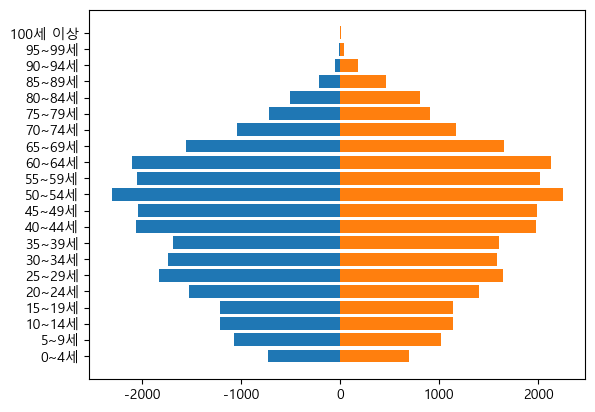

In [7]:
# 가로 막대 그래프
plt.barh(df.columns,-df.iloc[0]//1000)
plt.barh(df2.columns,df2.iloc[0]//1000)

1월,2월,3월,4월 합산을 해서 가로막대그래프를 출력하시오.

In [14]:
# 파일 월별 불러오고 컬럼 통일
# 남자 1월
df_m1 = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,E:Y')
df_m1  = df_m1 .head(1)
# 남자 2월
df_m2  = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,AY:BS')
df_m2  = df_m2 .head(1)
df_m2.columns = df_m1.columns
# 남자 3월
df_m3  = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,CS:DM')
df_m3  = df_m3 .head(1)
df_m3.columns = df_m1.columns
# 남자 4월
df_m4  = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,EM:FG')
df_m4  = df_m4 .head(1)
df_m4.columns = df_m1.columns
# 여자 1월
df_w1 = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,AB:AV')
df_w1 = df_w1.head(1)
df_w1.columns = df_m1.columns
# 여자 2월
df_w2 = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,BV:CP')
df_w2 = df_w2.head(1)
df_w2.columns = df_m1.columns
# 여자 3월
df_w3 = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,DP:EJ')
df_w3 = df_w3.head(1)
df_w3.columns = df_m1.columns
# 여자 4월
df_w4 = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,FJ:GD')
df_w4 = df_w4.head(1)
df_w4.columns = df_m1.columns

In [25]:
# 남자 연령대별 1~4월 더함
m1_m2_add = df_m1.add(df_m2, fill_value=0)
m12_m3_add = m1_m2_add.add(df_m3, fill_value=0)
m123_m4_add = m12_m3_add.add(df_m4, fill_value=0)

# 여자 연령대별 1~4월 더함
w1_w2_add = df_w1.add(df_m2, fill_value=0)
w12_w3_add = w1_w2_add.add(df_m3, fill_value=0)
w123_w4_add = w12_w3_add.add(df_m4, fill_value=0)


In [26]:
m123_m4_add

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,2882055,4263636,4836643,4836450,6051599,7266690,6980058,6694138,8230214,8126553,...,8213035,8423862,6271963,4167359,2868779,2053413,864048,220484,36152,5584


In [27]:
w123_w4_add

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,2846640,4211581,4770211,4759312,5929714,7085464,6822215,6608273,8155586,8077430,...,8178051,8459002,6366696,4303457,3064208,2347999,1111254,343343,67078,10881


<BarContainer object of 21 artists>

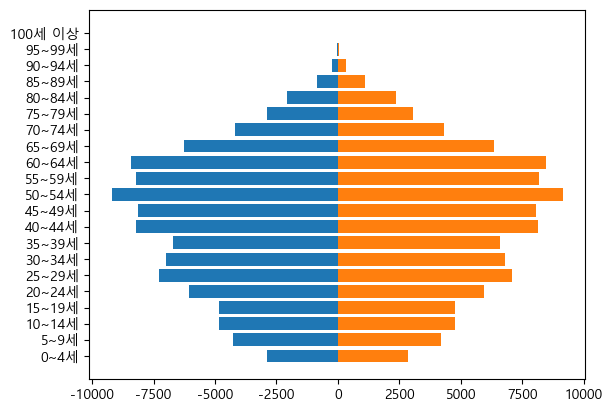

In [28]:
plt.barh(m123_m4_add.columns,-m123_m4_add.iloc[0]//1000)
plt.barh(w123_w4_add.columns,w123_w4_add.iloc[0]//1000)